In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

273565.0
Number of found circles: 0


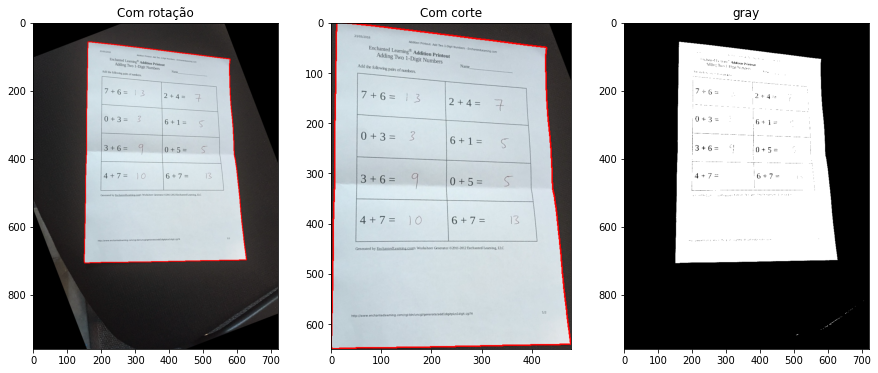

In [8]:
# Load an image
img = cv2.imread('img/scan.jpg')
# Rotação da imagem de 21 graus
(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 21, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
# Clone original image to not overlap drawings
clone = rotated.copy()

# Convert to gray
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray, thresh=127, maxval=255,type=cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)

# Find contours
#contours, _= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edge_detected_image, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_NONE)

contour_list = []
areaList = [cv2.contourArea(c) for c in contours ]
for contour in contours:
    area = cv2.contourArea(contour)
    if ( area >= max(areaList) ):
        print(area)
        contour_list.append(contour)


# Draw contours on the original image
cv2.drawContours(rotated, contour_list,  -1, (255,0,0), 2)


# there is an outer boundary and inner boundary for each eadge, so contours double
print('Number of found circles: {}'.format(int(len(contour_list)/2)))

#Achar o rectangulo da area dos contornos:
cnt = contour_list[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
x,y,w,h = cv2.boundingRect(cnt)

# Cortar a imagem para a area
crop_img = rotated[y:y+h, x:x+w]

plt.figure(figsize=(15,6))   
plt.subplot(131) 
plt.title('Com rotação')
plt.imshow(rotated)
plt.subplot(132) 
plt.title('Com corte')
plt.imshow(crop_img)
plt.subplot(133) 
plt.title('gray')
plt.imshow(gray_threshed, cmap='gray')